In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [18]:
house = pd.read_csv('house_prices.csv')
print(house.shape)
house.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,N,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,N,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,N,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,N,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,N,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [19]:
X = house.drop('price', axis=1)  # Features
y = house['price']  # Target variable

In [20]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Exclude 'date' from categorical columns if present
if 'date' in categorical_cols:
    categorical_cols.remove('date')


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

date_column = 'date'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the date column to strings before encoding
X_train[date_column] = X_train[date_column].astype(str)
X_test[date_column] = X_test[date_column].astype(str)

# Fit the encoder to the unique values in the date column of both training and testing data
# This ensures all possible date values are seen by the encoder
all_dates = pd.concat([X_train[date_column], X_test[date_column]]).unique()
label_encoder.fit(all_dates)

# Transform the 'date' column in both training and testing sets
X_train[date_column] = label_encoder.transform(X_train[date_column])
X_test[date_column] = label_encoder.transform(X_test[date_column])

In [23]:
X_train = X_train.drop('waterfront', axis=1)
X_test = X_test.drop('waterfront', axis=1)

In [24]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Exclude 'date' and 'waterfront' from categorical columns if present
exclude_cols = ['date', 'waterfront']
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

for col in categorical_cols:
    # Create dummy variables for the categorical column
    dummies = pd.get_dummies(X_train[col], prefix=col, drop_first=True)

    # Concatenate dummy variables to the training set
    X_train = pd.concat([X_train, dummies], axis=1)

    # Drop the original categorical column
    X_train = X_train.drop(columns=[col])

    # Repeat the same process for the test set
    dummies = pd.get_dummies(X_test[col], prefix=col, drop_first=True)
    X_test = pd.concat([X_test, dummies], axis=1)
    X_test = X_test.drop(columns=[col])

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

# 1. Create an imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean') # You can change the strategy if needed

# 2. Fit the imputer on your training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [28]:
y_pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 42071429748.09718
Mean Absolute Error: 100635.72523710388
R² Score: 0.7217069407051545


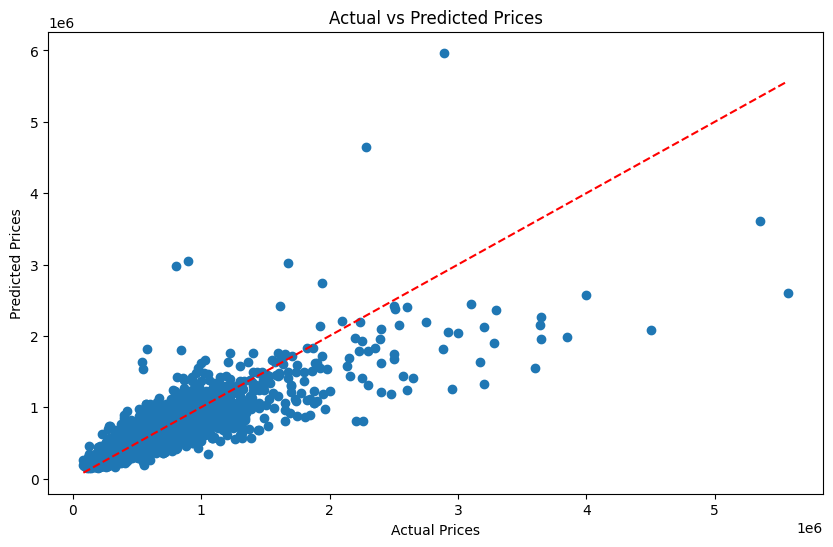

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

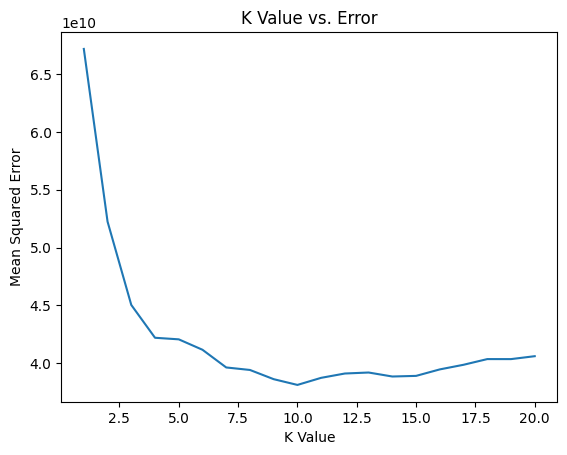

In [33]:
from sklearn.metrics import mean_squared_error

k_values = range(1, 21)
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred_k))

plt.plot(k_values, mse_values)
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("K Value vs. Error")
plt.show()
